<h1 style="text-align: center;">Sample Size Calculations for Bayesian Clinical Studies</h1>
<h1 style="text-align: center;">DLSPH Health Data Working Group</h1>

$\;$

<table><tr>
<td> <img src="dalla-lana.jpg" alt="DLSPH_Logo" style="height: 300px;"/> </td>
</tr></table>

$\;$

## Overview and Learning Objectives

Clinical studies must be carefully designed to facilitate the development of new medical treatments while addressing ethical concerns related to patient safety. Sample size calculations are an important component of study design. Bayesian methods for statistical inference offer advantages that can improve the design of clinical studies, including the ability to incorporate prior information or make preplanned modifications to the study as data are collected. However, Bayesian methods often require more computational overhead than their frequentist counterparts. Because simulation-based design requires that we simulate many repetitions of a study to explore its properties, this computational burden complicates the design of Bayesian clinical studies. 

This workshop provides an introduction to simulation-based design for Bayesian clinical studies and previews methods to reduce the computational burden of the design process. The learning outcomes for the workshop are as follows. By the end of the workshop, participants should be able to

* explain how Bayesian posterior probabilities are used in clinical decision making
* examine the impact of the prior distribution on Bayesian experimental design
* estimate sampling distributions of posterior probabilities using simulation
* recognize the potential to develop more efficient methods to design Bayesian clincial studies

$\;$

## About Your Facilitator
[Luke Hagar](https://lmhagar.github.io/) is a Postdoctoral Scholar at McGill University in the Department of Epidemiology, Biostatistics and Occupational Health. At McGill, Luke is developing computationally efficient methods to design Bayesian clinical trials. He earned his PhD in Statistics from the University of Waterloo in 2024. Before working on clinical designs, Luke developed design methods for Bayesian online controlled experiments, collaborating with data scientists at Airbnb on this topic. He is an active member of the Statistical Society of Canada and encourages students to get involved with the CSSC and SARGC.

## Motivating Example: MindLift

$\;$

<table><tr>
<td> <img src="MindLift.png" alt="mindlift_logo" style="height: 300px;"/> </td>
</tr></table>

$\;$

* Suppose we're developing a randomized controlled trial to evaluate MindLift, a fictional app aimed at improving symptoms of mild to moderate depression by providing CBT-based support.

* Participants are randomly assigned to either
    * the *control* group (access to standard mental health resources) or
    * the *treatment* group (access to MindLift for 4 weeks).

* At the beginning and end of the study, all patients complete PHQ-9 [[1]](https://www.hiv.uw.edu/page/mental-health-screening/phq-9), a questionnaire to measure depression.

* The primary outcome quantifies whether each participant experienced a clinically meaningful ($\ge$ 5-point) reduction in their PHQ-9 score at the end of the study:
    * $y_i = 1$ denotes meaningful improvement for patient $i$ and
    * $y_i = 0$ denotes no meaningful improvement.

$\;$

**Estimands**

* Let $\theta = \Pr(Y=1)$ be the probability of experiencing meaningful improvement.
* The probabilities of experiencing meaningful improvement on the control and treatment arms are $\theta_c$ and $\theta_t$, respectively.

$\;$

**Hypotheses**
* We want to assess the complementary hypotheses $H_0: \theta_t \le \theta_c$ vs. $H_1: \theta_t > \theta_c$.
* We evaluate these hypotheses with *posterior probabilities*.

## Review of Posterior Distributions

**General Overview**

* We consider a general parameter $\theta$. In a Bayesian framework, this parameter is not an unknown constant; it is a random variable that we assign a *prior distribution* to.
* The prior distribution $p(\theta)$ quantifies the information about the parameter that is available before observing any data.
* Let's suppose we obtain observed data $y$.
* We then update our knowledge of the parameter $\theta$ using Bayes' rule. This updated knowledge of our parameter is quantified using the *posterior distribution* of $\theta$ given the observed data $y$: $\theta|y \sim p(\theta|y)$.
  
$\;$

By Bayes' rule, we have that 
$$p(\theta|y) = \frac{L(y|\theta)p(\theta)}{\int_\theta L(y|\theta)p(\theta) d\theta} \propto L(y|\theta)p(\theta),$$
where $L(y|\theta) = \prod_{i=1}^nf(y_i|\theta)$ is the likelihood function and $f(y|\theta)$ is the model for the data.

**Motivating Example**

For our example, $\theta = \mathbb{P}(Y=1)$ is the probability of experiencing meaningful improvement. We can model these data for a single group using a Bernoulli distribution with probability mass function $$f(y|\theta) = \theta^y(1-\theta)^{1-y} ~~~ \text{for }0<\theta<1.$$ The corresponding likelihood is $$L(y|\theta) = \prod_{i=1}^nf(y_i|\theta) = \theta^{\sum y_i}(1-\theta)^{n-\sum y_i}.$$

To conduct Bayesian inference, we must define a prior distribution for $\theta$. A common choice for this distribution when $\theta \in [0,1]$ is the beta distribution. That is,
$$\theta\sim \text{BETA}(\alpha,\beta)$$
with shape parameters $\alpha > 0$ and $\beta > 0$. The corresponding probability density function is given by $$p(\theta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1},$$ where $\Gamma(\cdot)$ is the gamma function. 

The posterior distribution is found using Bayes' Rule:

\begin{eqnarray}
p(\theta|y) &\propto& L(y|\theta)p(\theta) \\
&=& \theta^{\sum y_i}(1-\theta)^{n-\sum y_i} \times \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1} \\
&\propto& \theta^{\alpha+\sum y_i-1}(1-\theta)^{\beta + n-\sum y_i - 1} \\
&\propto& \frac{\Gamma(\alpha + \sum y_i)\Gamma(\beta + n - \sum y_i)}{\Gamma(\alpha+\beta + n)}\theta^{\alpha + \sum y_i-1}(1-\theta)^{\beta + n-\sum y_i - 1}
\end{eqnarray}

Because our posterior distribution must integrate to 1, we have that our posterior distribution $\theta|y$ is $$\text{BETA}\left(\alpha+\sum_{i=1}^n y_i, \beta + n - \sum_{i=1}^n y_i\right).$$ 

* For this example, the posterior distribution is conveniently known in closed form.
* When $p(\theta|y)$ is not known in closed form, we must approximate this distribution using simulation (e.g., Markov chain Monte Carlo methods). This simulation is often *computationally intensive* - think about your previous workshop on JAGS and Stan! This computational burden slows down the design of Bayesian studies.
* To make sure we can quickly run simulations in this workshop, we will focus on the case where the posterior is known is closed form. We discuss the computational challenges with Bayesian experimental design later in the workshop.

## Posterior Probabilities for the Motivating Example

Let's first focus on the *control arm* of our MindLift example. To obtain the posterior distribution of $\theta_c$, we must first specify a prior distribution for this parameter. For now, we suppose that we have no prior information and pretend all values in $[0,1]$ are equally plausible for $\theta_c$. 

That is, we will assume a diffuse $\text{BETA}(1, 1)$ prior for $\theta_c$. This choice is equivalent to assuming $\theta_c \sim \text{UNIF}(0,1)$. The code chunk below contains a function that creates two plots. The left plot visualizes the prior distribution for prior beta shape parameters $\alpha$ and $\beta$.

Let's suppose that we assign $n = 100$ participants to the control arm and 30 of them experience meaningful reduction in their PHQ-9 score. Based on the formula above, our posterior distribution for $\theta_c|y$ is
$$\text{BETA}\left(1 + 30, 1 + 100 - 30\right) = \text{BETA}(31, 71).$$
The right plot created by the function below visualizes the posterior distribution for a total number of participants $n$ and a total number of "successes" $y$.

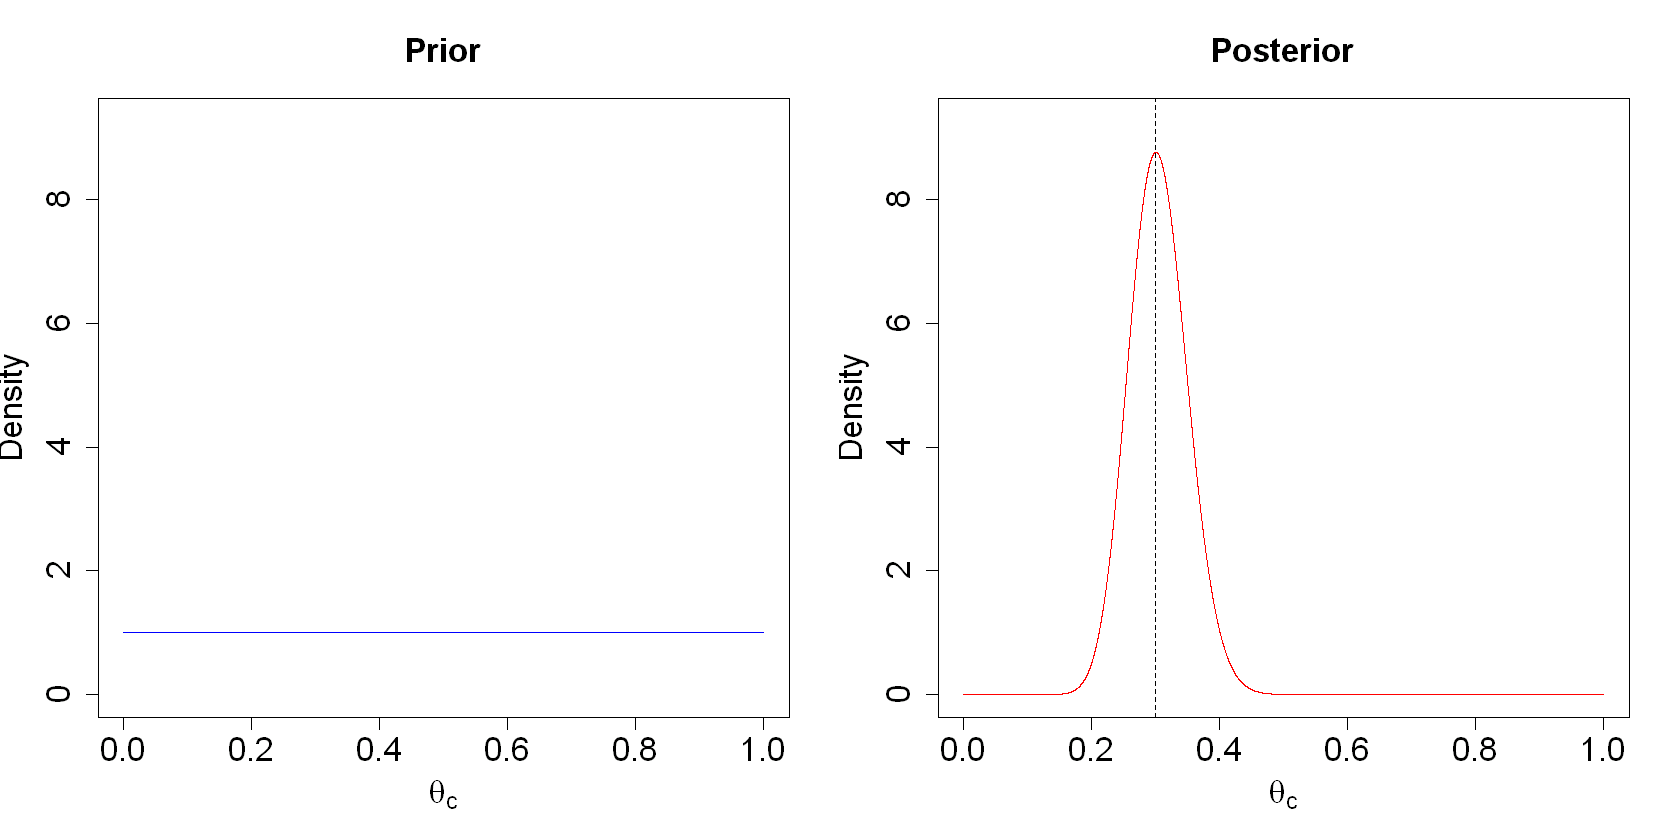

In [16]:
# this function allows us to explore the relationship between the 
# prior distribution, the data, and the posterior distribution
prior_posterior <- function(a, b, n, y){
    # the inputs are as follows:
    # a is the alpha parameter for the prior
    # b is the beta parameter for the prior
    # n is the number of participants
    # y is the number of meaningful PHQ-9 reductions

    # get the posterior shape parameters 
    a.post <- a + y
    b.post <- b + n - y

    # get x and y values for plotting
    x <- seq(0, 1, by = 0.0001)
    y.prior <- dbeta(x, a, b)
    y.post <- dbeta(x, a.post, b.post)

    # set a common y-axis for the two plots
    y.max <- max(y.prior, y.post)

    # create a plot grid
    options(repr.plot.width = 14, repr.plot.height = 7)
    par(mfrow = c(1, 2))
    # create left plot for the prior
    plot(x, y.prior, type = "l", xlab = bquote(theta[c]),
         ylab = "Density", main = "Prior", col = "blue",
         cex = 1.65, cex.lab = 1.65, cex.axis = 1.65, cex.main = 1.65,
         ylim = c(0, y.max + 0.5))
    # create right plot for the posterior
    plot(x, y.post, type = "l", xlab = bquote(theta[c]),
         ylab = "Density", main = "Posterior", col = "red",
         cex = 1.65, cex.lab = 1.65, cex.axis = 1.65, cex.main = 1.65,
         ylim = c(0, y.max + 0.5))
    # add a dotted line for the sample average
    abline(v = y/n, lty = 2)
    par(mfrow = c(1, 1))
}

prior_posterior(1, 1, 100, 30)

Let's now use the `prior_posterior()` function above to explore how the prior distribution $\text{BETA}(\alpha, \beta)$ and sample size $n$ impact the posterior distribution. What do you notice? 

In [ ]:
# try changing the inputs for a and b and compare the resulting plot to the one above
prior_posterior(1, 1, 100, 30)

# now try changing the sample size

Our hypotheses of interest are $H_0: \theta_t \le \theta_c$ vs. $H_1: \theta_t > \theta_c$. We must therefore consider the posterior of $\theta_t - \theta_c$ and compare it to 0. Let's also assign a $\text{BETA}(1,1)$ prior to $\theta_t$. 

Let's suppose that we assign 100 patients to the MindLift arm and 40 of them experience meaningful improvement. Our posterior distribution for $\theta_t|y$ is therefore $$\text{BETA}(41, 81).$$ Under the assumption that observations in the control and treatment arms are independent, we can estimate the posterior distribution of $\theta_t - \theta_c$ using simulation below. We can summarize this distribution using the *posterior probability* that $\theta_t - \theta_c > 0$:
$$\Pr(\theta_t - \theta_c > 0|y),$$
where $y$ consists of the data from both the treatment and control arms.

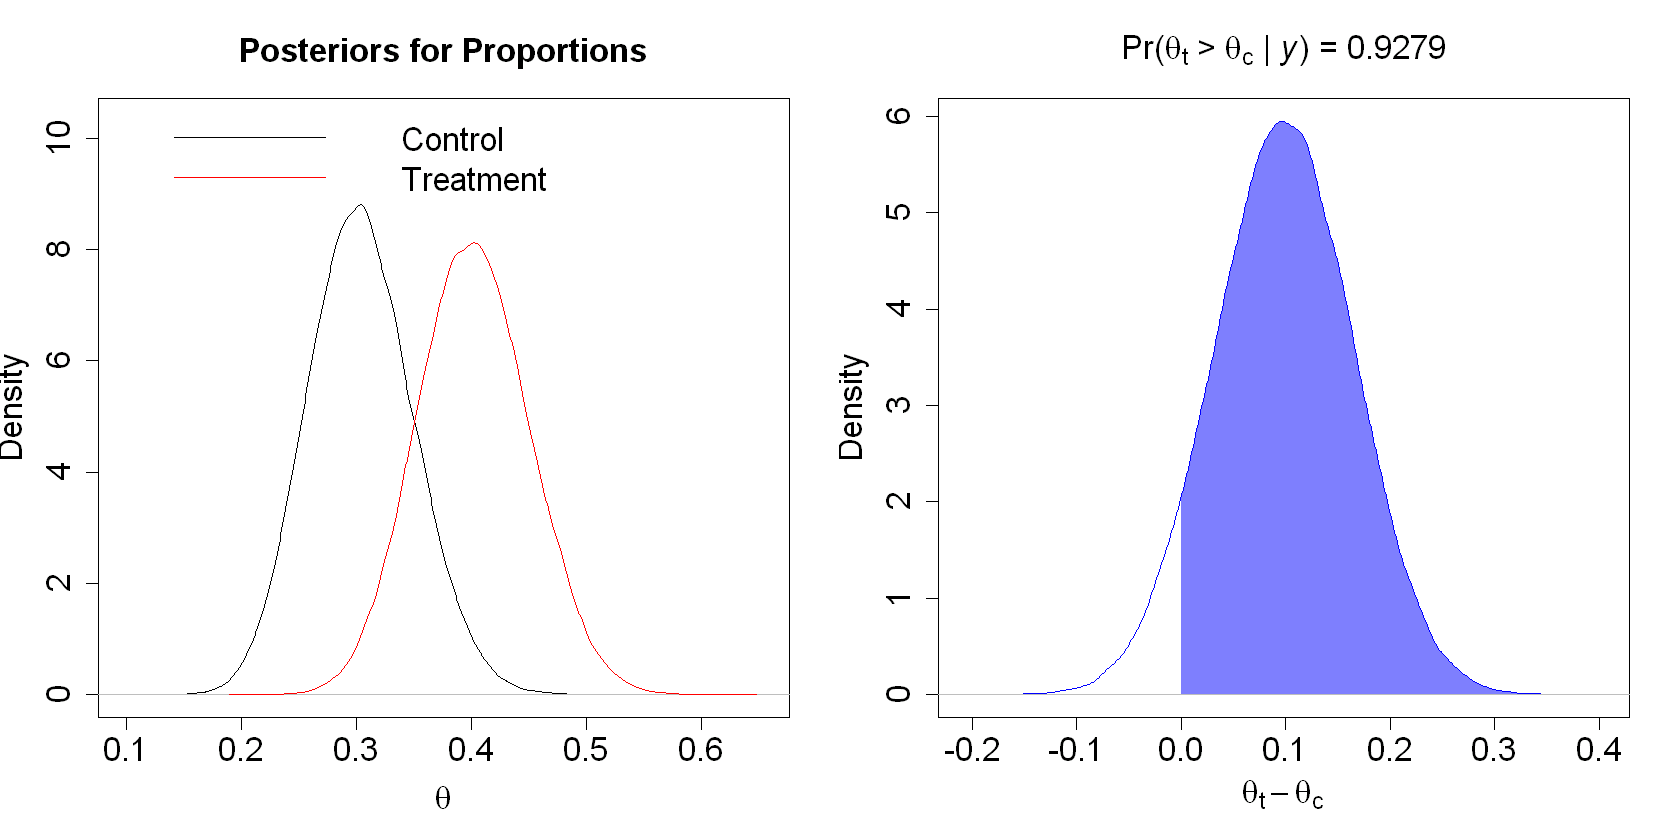

In [2]:
posterior_diff <- function(a.c = 1, b.c = 1, a.t = 1, b.t = 1, n.c, y.c, n.t, y.t){
    # the inputs are as follows:
    # a.c is the alpha parameter for the prior in the control group (default value is 1)
    # b.c is the beta parameter for the prior in the control group (default value is 1)
    # n.c is the number of participants in the control group
    # y.c is the number of meaningful PHQ-9 reductions in the control group
    # a.t, b.t, n.t, and y.t are the corresponding inputs for the treatment group

    # simulate from the posteriors of theta.c and theta.t
    theta.c <- rbeta(100000, a.c + y.c, b.c + n.c - y.c)
    theta.t <- rbeta(100000, a.t + y.t, b.t + n.t - y.t)

    # get an appropriate range for the x-axis
    x.range <- range(c(theta.c, theta.t)) + c(-0.02, 0.02)

    # get an appropriate range for the y-axis
    dens.c <- density(theta.c)
    dens.t <- density(theta.t)
    y.max <- max(c(dens.c$y, dens.t$y))

    # create a plot grid
    options(repr.plot.width = 14, repr.plot.height = 7)
    par(mfrow = c(1, 2))

    # plot the posteriors for the parameters
    plot(dens.c,  xlab = bquote(theta),
         col = "black", xlim = x.range, ylim = c(0, y.max + 1.5),
         ylab = "Density", main = "Posteriors for Proportions",
         cex = 1.65, cex.lab = 1.65, cex.axis = 1.65, cex.main = 1.65)
    # add density plot for posterior of theta.t and legend
    lines(dens.t, col = "red")
    legend("topleft", c("Control", "Treatment"), col = c("black", "red"), lty = 1,
          bty = "n", cex = 1.65)

    # compute posterior probability for plot later
    p.prob <- round(mean(theta.t - theta.c > 0), 4)

    # get density plot for the difference in proportions
    dens.diff <- density(theta.t - theta.c)

    # plot the posterior of the difference between theta.t and theta.c
    # output posterior probability in the title
    plot(dens.diff, col = "blue",
         ylab = "Density", xlab = bquote(theta[t] - theta[c]),
        cex = 1.65, cex.lab = 1.65, cex.axis = 1.65, cex.main = 1.65,
        main = bquote('Pr('*theta[t] * ' > ' * theta[c]*' | '*italic(y)*') = '*.(p.prob)))
    # colour code the proportion of posterior that corresponds to theta.t > theta.c
    polygon(x = c(0, dens.diff$x[dens.diff$x > 0], max(dens.diff$x) + 0.01), 
            y = c(0,dens.diff$y[dens.diff$x > 0], 0), 
            col = adjustcolor("blue", 0.5), border = NA)

    par(mfrow = c(1, 1))
         
}

# use function for the motivating example
posterior_diff(n.c = 100, y.c = 30, n.t = 100, y.t = 40)

Let's try using the `posterior_diff()` function with different values for the inputs `y.t` and `y.c`. What do you observe?

In [ ]:
# change the values of y.t and/or y.c
posterior_diff(n.c = 100, y.c = 30, n.t = 100, y.t = 40)

## Hypothesis Testing for the MindLift Example

**Decision-Making Procedure**
* We aim to support the hypothesis $H_1: \theta_t > \theta_c$ over the hypothesis $H_0: \theta_t \le \theta_c$.
* We conclude that $H_1$ is true if $\Pr(H_1 | y) = \Pr(\theta_t > \theta_c | y) > \gamma$ for some *decision threshold* $\gamma \in (0,1)$.
* We choose this decision threshold to limit the probability of making *incorrect* decisions in our study.

**Errors in Clinical Settings**
* We may incorrectly *conclude* that $H_1$ is true. That is, $\Pr(H_1 | y)$ may exceed $\gamma$ when $H_0$ is true. What are the implications?
* We may incorrect *not conclude* that $H_1$ is true. That is, $\Pr(H_1 | y)$ may not exceed $\gamma$ even when $H_1$ is true. What are the implications?

**Error Control in Clinical Studies**

Regulatory agencies, like Health Canada or the U.S. Food and Drug Administration, require that the frequentist operating characteristics of Bayesian clinical studies are reported [[2]](https://www.fda.gov/regulatory-information/search-fda-guidance-documents/adaptive-design-clinical-trials-drugs-and-biologics-guidance-industry). Desired valuables for these operating characteristics can be obtained by choosing suitable values for the decision threshold and sample size. The following process is usually followed:

1. Choose a decision threshold $\gamma$ to ensure the probability of making a *type I error* (i.e., incorrectly concluding $H_1$ is true) is at most $\alpha \in (0,1)$.
2. Given this decision threshold, choose a sample size $n$ to ensure the probability of making a *type II error* (i.e., incorrectly not conclusing that $H_1$ is true) is at most $\beta \in (0,1)$. This is equivalent to making sure that the *power* of the study is at least $1 - \beta$.

**Random vs. Fixed Quantities**

* To consider the probability of making an error, we must consider the *random* quantity $\Pr(H_1 | Y)$, where $Y$ denotes the to-be-observed data, which are unknown at the design stage of a study.
* We assume that $Y$ is generated according to some data generation process. This data generation process defines a *sampling distribution* for $Y$, which in turn defines a sampling distribution for $\Pr(H_1 | Y)$.
* Because $\Pr(H_1 | Y)$ is a random quantity, the probability of making an error is related to the probability that $\Pr(H_1 | Y) > \gamma$. 
* We emphasize that $\Pr(H_1 | y)$ considered earlier for an observed sample $y$ is *not random*, so it does not make sense to consider the probability that $\Pr(H_1 | y) > \gamma$.

**Data Generation Processes**

We define data generation processes to consider criteria for the probabilities of making type I and II errors.
1. We want $\Pr(\Pr(H_1 | Y) > \gamma ~|~\Psi_0) \le \alpha$ where $\Psi_0$ is a data generation process for $Y$ such that $H_0$ is true.
2. We want $\Pr(\Pr(H_1 | Y) > \gamma~|~\Psi_1) \ge 1 - \beta$ where $\Psi_1$ is a data generation process for $Y$ such that $H_1$ is true.

**Simulation-Based Process to Estimate Error Rates** [[3]](https://www.jstor.org/stable/3182824?casa_token=PVUE2ZIeTcUAAAAA%3AMncuDH50AzHrImJ3zyX7xxGOHIPjU_QPK0zmKdjWgZYu6CNjgDDUxyz9-TMhzjAVmJJAEnAGqrAOHkyQ4rcRoQaVeDRn7PlLEy_5v_pio0zXus6txT0P)
* We can estimate the probabilities of making errors by simulating *many* samples $y$ according to $\Psi_0$ (or $\Psi_1$).
* For each sample $y$, we compute the posterior probability $\Pr(H_1|y)$.
* The collection of posterior probabilities $\Pr(H_1|y)$ estimates the sampling distribution of $\Pr(H_1 | Y)$ under $\Psi_0$ (or $\Psi_1$).
* We must repeat this process for *every* sample size and data generation process we consider. This process is very computationally intensive for more complex examples!


## Choosing a Desicion Threshold

Let's now define a data generation process $\Psi_0$. For illustration, we define $\Psi_0$ such that $Y_i \sim \text{BIN}(1, 0.3)$ for patient $i$ regardless of whether they are in the treatment or control arm. Therefore, $\Pr(Y = 1) = 0.3$ in both arms, and the "true" values of $\theta_t$ and $\theta_c$ are 0.3. As such, $H_0$ is true.
* We often define $\Psi_0$ such that the "true" value of the parameter is on the *boundary* of the hypotheses $H_0$ and $H_1$. This allows us to control the type I error rate in the worst-case scenario.

Let's simulate a bunch of samples according to $\Psi_0$ when $n = 100$ in each group. The function below allows us to conduct these simulations and estimate the sampling distribution of posterior probabilities. We will use this sampling distribution estimate to discuss strategies for choosing a decision threshold.

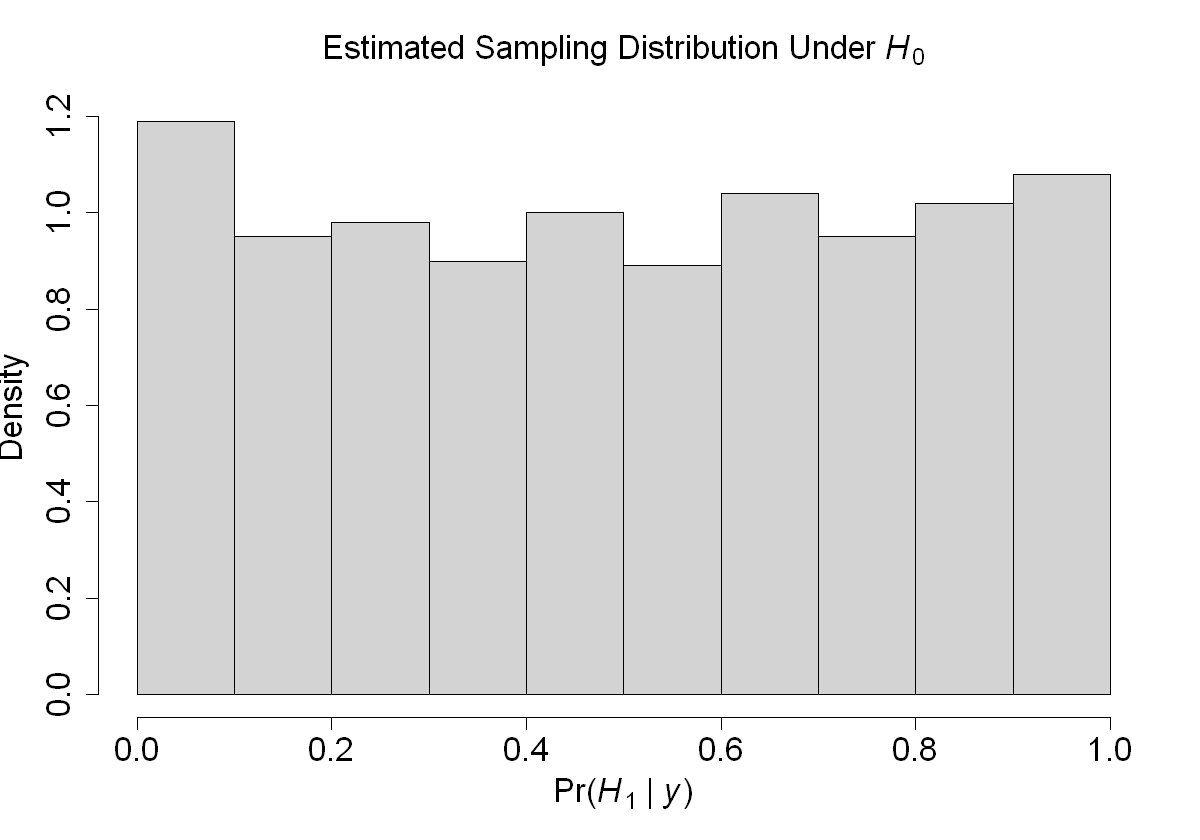

In [3]:
# function to estimate the sampling distribution of posterior probabilities
est_samp_dist <- function(n, true_theta.c = 0.3, true_theta.t = 0.3, n_sim = 1000,
                         a.c = 1, b.c = 1, a.t = 1, b.t = 1, seed = 1) {
    # the inputs are described as follows:
    # n is the sample size in each group
    # true_theta.c is the "true" proportion in the control arm
    # theta_true.t is the "true" proportion in the treatment arm
    # n_sim is the number of simulation repetitions
    # a.c is the alpha parameter for the prior in the control group (default value is 1)
    # b.c is the beta parameter for the prior in the control group (default value is 1)
    # a.t and b.t are the corresponding inputs for the treatment group
    # seed is a seed for reproducibility

    set.seed(seed)
    post.probs <- replicate(n_sim, {
        yc <- rbinom(1, n, true_theta.c)
        yt <- rbinom(1, n, true_theta.t)
        # use simulation to estimate posteriors
        post_t <- rbeta(1000, yt + a.t, n - yt + b.t)
        post_c <- rbeta(1000, yc + a.c, n - yc + b.c)
        # estimate posterior probability
        mean(post_t > post_c)
      })

    # return sampling distribution estimate
    post.probs
  
}

est.H0 <- est_samp_dist(100)
options(repr.plot.width = 10, repr.plot.height = 7)
hist(est.H0, main = bquote("Estimated Sampling Distribution Under "*italic(H)[0]),
    xlab = bquote('Pr('*italic(H)[1]*' | '*italic(y)*')'),
    freq = FALSE, cex = 1.65, cex.lab = 1.65, cex.main = 1.65, cex.axis = 1.65)

**Exercise to Explore Sampling Distribution Properties**

1. What do you notice about the estimated sampling distribution of posterior probabilities? This result is theoretically confirmed in [[4]](https://statisticalsupportandresearch.wordpress.com/wp-content/uploads/2019/03/josc3a9-m.-bernardo-adrian-f.-m.-smith-bayesian-theory-wiley-1994.pdf). Can we use this observation to select a decision threshold that will bound the type I error rate by $\alpha$? 

2. Try decreasing the `n` input for `simulate_trial()` in the code chunk above. What do you observe?

3. Let's consider `n` = 100 again. What happens if you choose a smaller input for `true_theta.c` into the `simulate_trial()` function? 

In [ ]:
# use this function call with a different input for n, etc.
est.H0 <- est_samp_dist(100)

# no edits required
options(repr.plot.width = 10, repr.plot.height = 7)
hist(est.H0, main = bquote("Estimated Sampling Distribution Under "*italic(H)[0]),
    xlab = bquote('Pr('*italic(H)[1]*' | '*italic(y)*')'),
    freq = FALSE, cex = 1.65, cex.lab = 1.65, cex.main = 1.65, cex.axis = 1.65)

**Guidance for Choosing Decision Threshold**

A decision threshold of $\gamma = 1 - \alpha$ is often a suitable choice for clinical studies with
* sufficiently large sample sizes $n$,
* interest in controlling the type I error rate on the boundary of $H_0$ and $H_1$, and
* diffuse prior distributions (more information on this later).

However, the choice for the decision threshold(s) can be much more complicated when there are *multiple comparisons* in a study or the study is designed as a *sequential* experiment (see e.g., [[5]](https://books.google.ca/books/about/Group_Sequential_Methods_with_Applicatio.html?id=7FQwngEACAAJ&redir_esc=y)). Those more complex designs are beyond the scope of this workshop.

## Choosing a Sample Size

Let's now define a data generation process $\Psi_1$. For illustration, we again define $\Psi_1$ such that $Y_i \sim \text{BIN}(1, 0.3)$ for patient $i$ if they are in the control arm. However, we now assume that $Y_i \sim \text{BIN}(1, 0.4)$ for patient $i$ if they are in the MindLift arm.

Therefore, $\Pr(Y = 1) = 0.3$ and $\Pr(Y = 1) = 0.4$ in the control and treatment arms, respectively. The "true" values of $\theta_t$ and $\theta_c$ are 0.4 and 0.3. As such, $H_1$ is now true.
* We must define $\Psi_1$ such that $H_1$ true. Since there are many such models $\Psi_1$, we often choose a model that corresponds to a *minimum effect size* that we would like to detect (similar to a frequentist sample size calculation).
* In a Bayesian framework, we could also incorporate *uncertainty* in the "effect size" or data generating parameters (more on this later).

Let's simulate a bunch of samples according to $\Psi_1$ when $n = 100$ in each group and compare this estimate of the sampling distribution of posterior probabilities to that obtained earlier under $\Psi_0$. How do these sampling distributions differ?

[1] 0.314

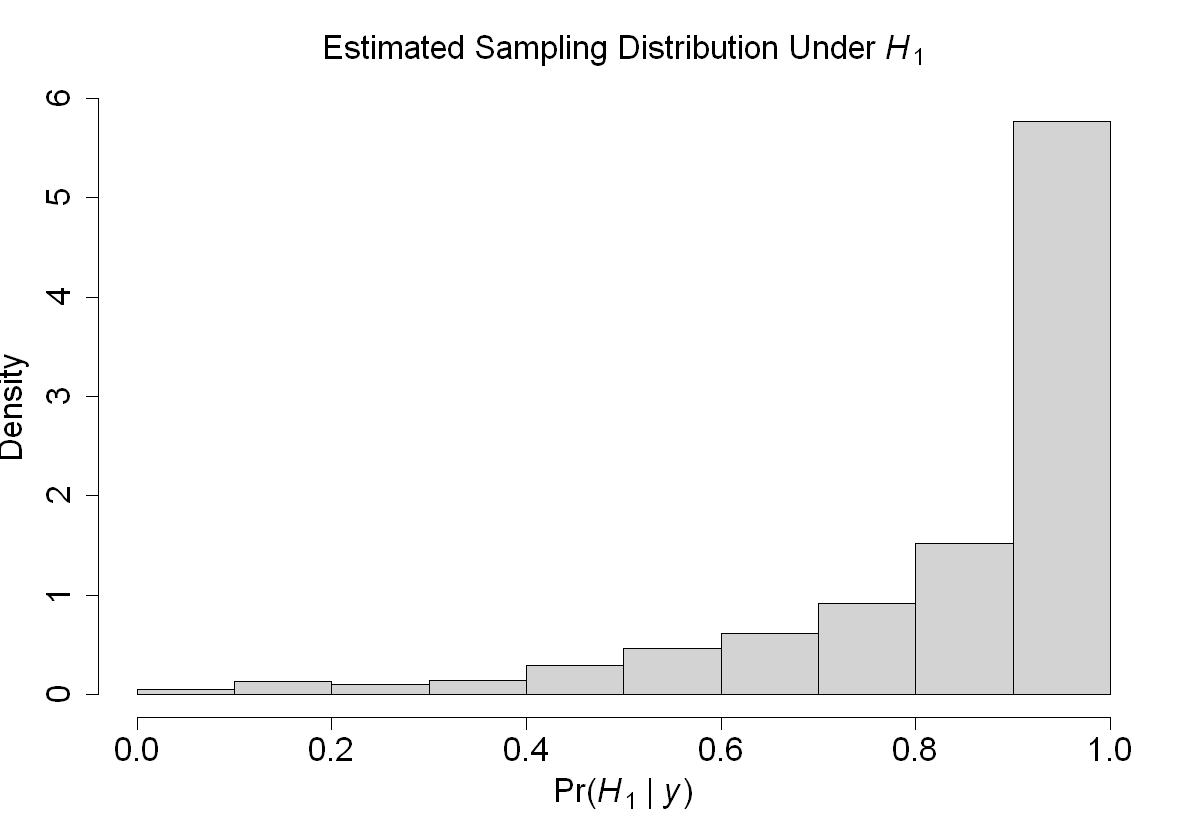

In [4]:
# use the function from earlier with a different input for true_theta.t
est.H1 <- est_samp_dist(100, true_theta.t = 0.4)

# plot results
options(repr.plot.width = 10, repr.plot.height = 7)
hist(est.H1, main = bquote("Estimated Sampling Distribution Under "*italic(H)[1]),
    xlab = bquote('Pr('*italic(H)[1]*' | '*italic(y)*')'),
    freq = FALSE, cex = 1.65, cex.lab = 1.65, cex.main = 1.65, cex.axis = 1.65)

# estimate power
gam <- 0.975
mean(est.H1 > gam)

Let's suppose that we want to have a type I error rate of at most $\alpha = 0.025$. In that case, a decision threshold of $\gamma = 0.975$ can be selected. The *power* of the study at a given sample size $n$ can be estimated by computing the proportion of posterior probabilities in our sampling distribution above that exceed 0.975. The code to estimate power at $n = 100$ is given above; the estimate is 0.314.

In the code chunk below, let's explore 
* how the power estimate changes if we change the `seed` input and
* how the power estimate changes with a different sample size `n`.

In [ ]:
# use the function from earlier with a different input for seed
est.H1 <- est_samp_dist(100, true_theta.t = 0.4, seed = 2)

# plot results
options(repr.plot.width = 10, repr.plot.height = 7)
hist(est.H1, main = bquote("Estimated Sampling Distribution Under "*italic(H)[1]),
    xlab = bquote('Pr('*italic(H)[1]*' | '*italic(y)*')'),
    freq = FALSE, cex = 1.65, cex.lab = 1.65, cex.main = 1.65, cex.axis = 1.65)

# estimate power
mean(est.H1 > gam)

In [ ]:
# use the function from earlier with a different input for n
est.H1 <- est_samp_dist(300, true_theta.t = 0.4, seed = 1)

# plot results
options(repr.plot.width = 10, repr.plot.height = 7)
hist(est.H1, main = bquote("Estimated Sampling Distribution Under "*italic(H)[1]),
    xlab = bquote('Pr('*italic(H)[1]*' | '*italic(y)*')'),
    freq = FALSE, cex = 1.65, cex.lab = 1.65, cex.main = 1.65, cex.axis = 1.65)

# estimate power
mean(est.H1 > gam)

What happens to the power estimate when we change the seed?
* The U.S. Food and Drug Administration recommends using 10000 simulation repetitions to precisely estimate power (and the type I error rate) for a given design [[2]](https://www.fda.gov/regulatory-information/search-fda-guidance-documents/adaptive-design-clinical-trials-drugs-and-biologics-guidance-industry). However, this is just rough guidance and using this many simulation repetitions does not guarantee precise estimation of the operating characteristics. We used 1000 simulation repetitions here so that the code runs quickly.

What happens to power as we change the sample size?
* Let's suppose we want the study power to be 0.8 (i.e., we want at most a 20% probability of making a type II error). We therefore want to find the *minimum* sample size $n$ such that the estimated power is at least 0.8.

The code chunk below uses binary search to find the smallest sample size $n$ with estimated power of least 0.8

[1] "We now consider n = 100"
[1] "We now consider n = 200"
[1] "We now consider n = 400"
[1] "We now consider n = 250"
[1] "We now consider n = 325"
[1] "We now consider n = 363"
[1] "We now consider n = 344"
[1] "We now consider n = 335"
[1] "We now consider n = 340"
[1] "We now consider n = 338"
[1] "We now consider n = 339"
[1] "The recommended sample size is n = 339; the estimated power is 0.808."


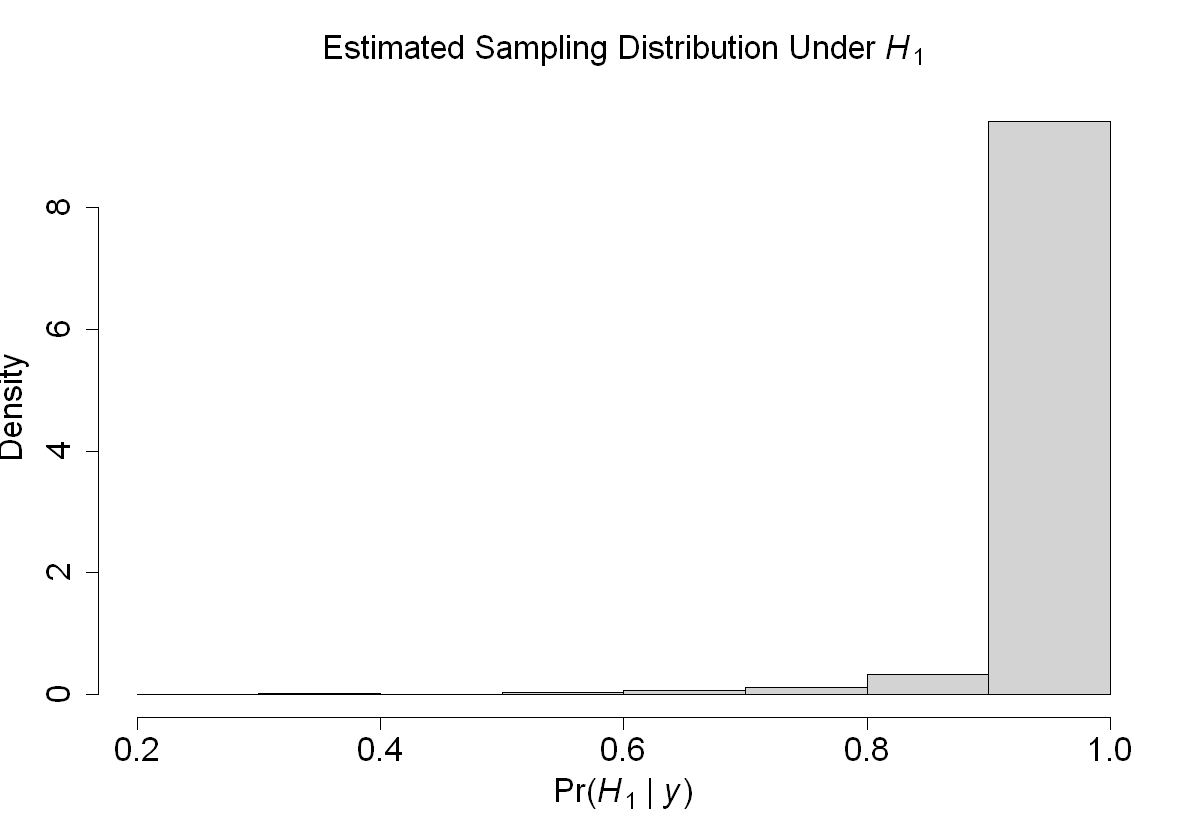

In [5]:
# this function uses binary search to find the smallest sample
# size that satisfies the power criteria
find_n <- function(true_theta.c = 0.3, true_theta.t = 0.3, n_sim = 1000,
                   a.c = 1, b.c = 1, a.t = 1, b.t = 1, seed = 1,
                   n.init = 100, gam, target.power){

    # the inputs are the same as est_samp_dist() with three new inputs:
    # n.init is the initial sample size that we explore
    # gam is the decision threshold
    # target.pwr is the desired power for the study

    ## initialize binary search
    lower <- 1
    upper <- n.init

    # get initial estimate of the sampling distribution at n = n.init
    print(paste0('We now consider n = ', n.init))
    n.temp <- n.init
    i <- 0
    # save the sampling distribution and power estimate
    samp.temp <- est_samp_dist(n = n.temp, true_theta.c = true_theta.c, 
                               true_theta.t = true_theta.t, n_sim = n_sim,
                               a.c = a.c, b.c = b.c, a.t = a.t, b.t = 1, seed = seed)
    pwr.temp <- mean(samp.temp > gam)

    # if power is not large enough at n.init, we need to increase the sample size
    # to find an upper bound for binary search
    while (pwr.temp < target.power){
        i <- i + 1
        lower <- n.init
        n.temp <- 2*n.temp
        print(paste0('We now consider n = ', n.temp))
        samp.temp <- est_samp_dist(n = n.temp, true_theta.c = true_theta.c, 
                               true_theta.t = true_theta.t, n_sim = n_sim,
                               a.c = a.c, b.c = b.c, a.t = a.t, b.t = 1, seed = seed + i)
        pwr.temp <- mean(samp.temp > gam)
        }

    upper <- n.temp
    samp.final <- samp.temp
    pwr.final <- pwr.temp

    # update the upper and lower bounds for binary search until we find the 
    # optimal sample size
    while (upper - lower > 1){
        n.temp <- ceiling(0.5*(lower + upper))
        print(paste0('We now consider n = ', n.temp))
        samp.temp <- est_samp_dist(n = n.temp, true_theta.c = true_theta.c, 
                               true_theta.t = true_theta.t, n_sim = n_sim,
                               a.c = a.c, b.c = b.c, a.t = a.t, b.t = 1, seed = seed + i)
        pwr.temp <- mean(samp.temp > gam)

        if (pwr.temp < target.power){
            lower <- n.temp
            }
        else{
            upper <- n.temp
            samp.final <- samp.temp
            pwr.final <- pwr.temp
            }
        }
    # plot the sampling distribution estimate at the recommended sample size
    options(repr.plot.width = 10, repr.plot.height = 7)
    hist(samp.final, main = bquote("Estimated Sampling Distribution Under "*italic(H)[1]),
    xlab = bquote('Pr('*italic(H)[1]*' | '*italic(y)*')'),
    freq = FALSE, cex = 1.65, cex.lab = 1.65, cex.main = 1.65, cex.axis = 1.65)
    # output the power estimate
    print(paste0('The recommended sample size is n = ', upper, '; the estimated power is ',pwr.final, '.'))
    # return the recommended sample size
    return(upper)
    }

# implement the sample size calculation for MindLift example
recommended.n <- find_n(true_theta.t = 0.4, n.init = 100, gam = 0.975, target.power = 0.8)

The printed output shows that we need to estimate the sampling distribution *many* times (at different sample sizes) to get a final sample size recommendation.

For illustration, let's try running the sample size calculation with a different seed. Doing so illustrates that simulation variability can substantially impact our recommended design, particularly if we use a *small* number of simulation repetitions. 

## The Impact of the Prior Distribution

Let's now suppose that we want to use an informative prior distribution for $\theta_c$ in the control group. In clincial settings, there often is *some* knowledge of the standard treatment or placebo that the new treatment is being compared to. We suppose that prior knowledge suggests that there is approximately a 30% probability of someone substantially improving their PHQ-9 score with self-help resources (not including MindLift).

We can encode this information using a $\text{BETA}(30, 70)$ prior for $\theta_c$. This prior distribution has a similar effect to observing an additional 100 patients in the control arm, where 30 of them sustantially improve their PHQ-9 scores.

Let's use our `prior_posterior()` function from before to illustrate the new prior and an example posterior distribution where we combine this prior with an actual sample of 100 participants in the control arm with 30 successes.

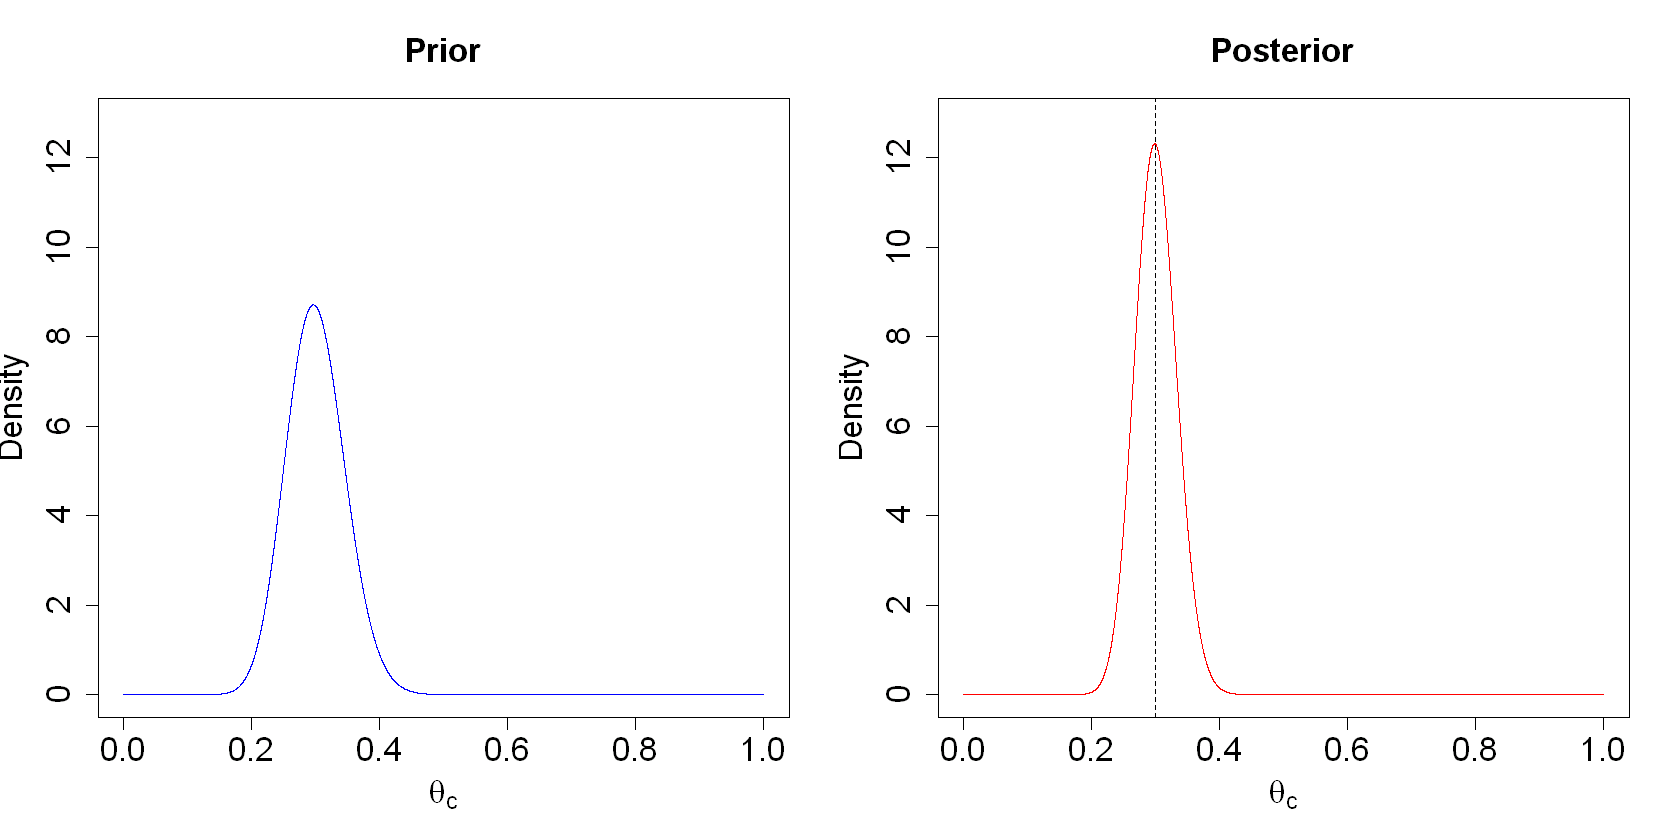

In [6]:
# use the function from earlier with a = 30 and b = 70
prior_posterior(30, 70, 100, 30)

Let's compare this prior and posterior with the results for the $\text{BETA}(1,1)$ prior for $\theta_c$ that we considered earlier? What difference do you notice between the two plots?

In [ ]:
prior_posterior(1, 1, 100, 30)

**The Impact on the Decision Threshold**

To explore the impact of the informative prior on the recommended decision threshold, let's use the `est_samp_dist()` function from earlier with $n = 100$ in each group and the $\text{BETA}(30,70)$ prior for $\theta_c$.

We also estimate the type I error rate for $\gamma = 0.975$. Is our type I error rate close to the desired $\alpha = 0.025$?

[1] 0.017

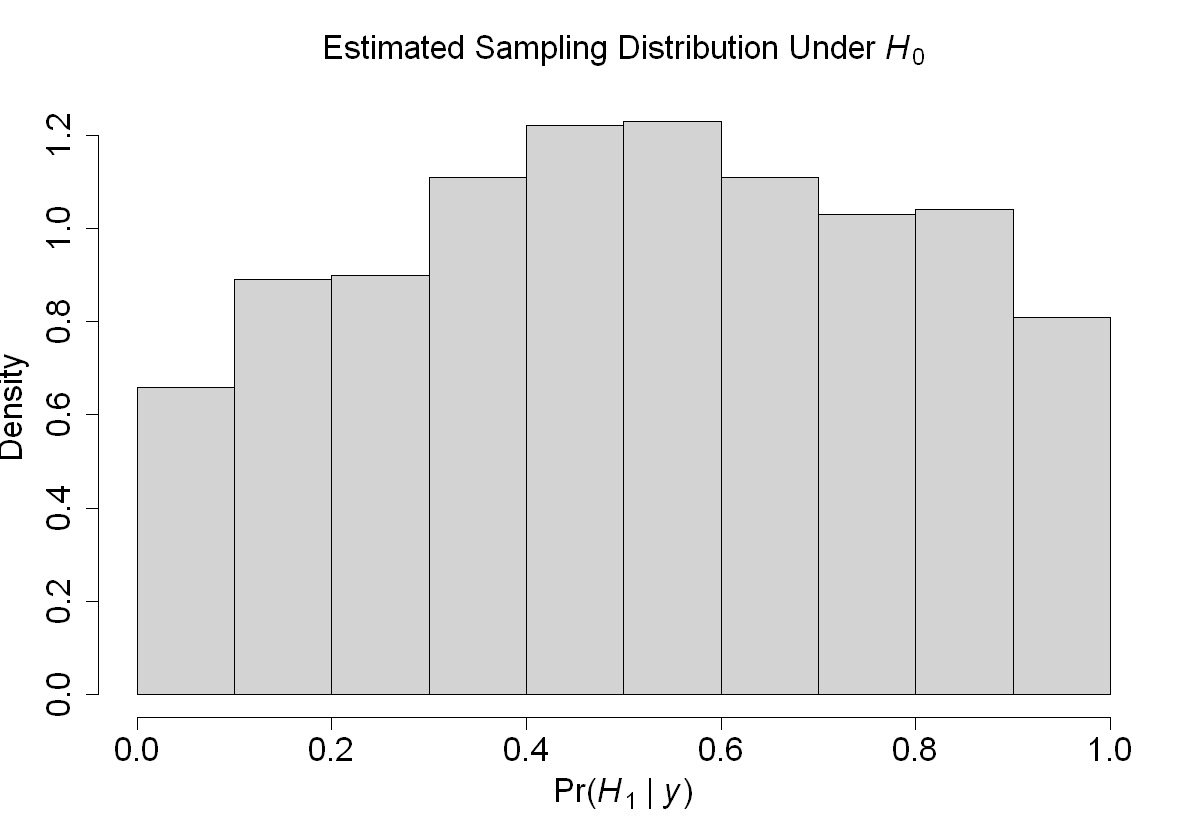

In [7]:
# estimate sampling distribution for n = 100 (as before) with a.c = 30 and b.c = 70
est.H0 <- est_samp_dist(100, a.c = 30, b.c = 70)
options(repr.plot.width = 10, repr.plot.height = 7)
hist(est.H0, main = bquote("Estimated Sampling Distribution Under "*italic(H)[0]),
    xlab = bquote('Pr('*italic(H)[1]*' | '*italic(y)*')'),
    freq = FALSE, cex = 1.65, cex.lab = 1.65, cex.main = 1.65, cex.axis = 1.65)

# estimate the type I error rate
mean(est.H0 > gam)

For confirmation, let's explore the impact of changing the prior distribution for $\theta_c$ back to $\text{BETA}(1,1)$.

We can also consider the impact of changing the sample size $n$ with the informative prior. What do you notice?

In [ ]:
# estimate sampling distribution for n = 100 (as before) with a.c = 1 and b.c = 1
est.H0 <- est_samp_dist(100, a.c = 1, b.c = 1)
options(repr.plot.width = 10, repr.plot.height = 7)
hist(est.H0, main = bquote("Estimated Sampling Distribution Under "*italic(H)[0]),
    xlab = bquote('Pr('*italic(H)[1]*' | '*italic(y)*')'),
    freq = FALSE, cex = 1.65, cex.lab = 1.65, cex.main = 1.65, cex.axis = 1.65)

# estimate the type I error rate
mean(est.H0 > gam)

## consider changing the sample size with the informative prior for theta.c

**Impact on the Sample Size**

For illustration, let's continue to use the decision threshold of $\gamma = 0.975$. Let's use our `find_n()` function to explore how the sample size recommendation changes with the informative prior. What do you notice?

[1] "We now consider n = 100"
[1] "We now consider n = 200"
[1] "We now consider n = 400"
[1] "We now consider n = 250"
[1] "We now consider n = 325"
[1] "We now consider n = 288"
[1] "We now consider n = 307"
[1] "We now consider n = 298"
[1] "We now consider n = 303"
[1] "We now consider n = 305"
[1] "We now consider n = 304"
[1] "The recommended sample size is n = 304; the estimated power is 0.825."


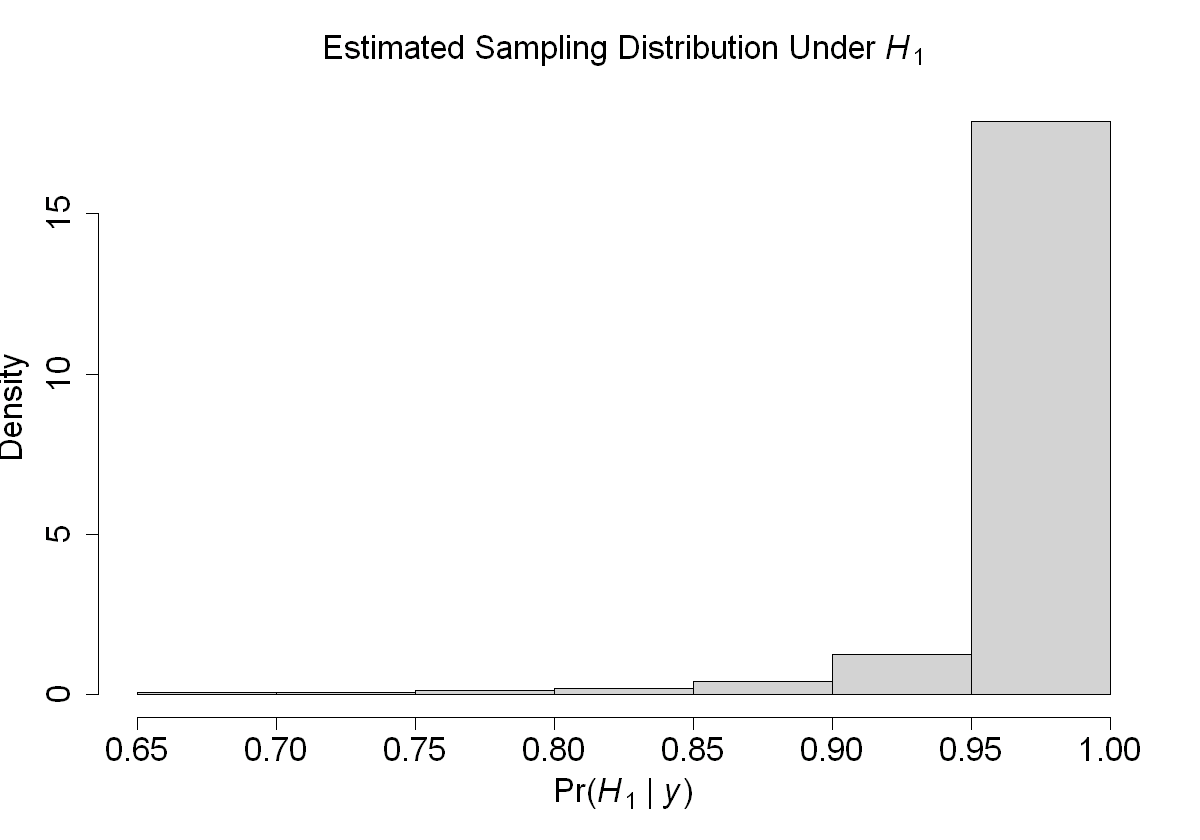

In [8]:
recommended.n <- find_n(true_theta.t = 0.4, n.init = 100, gam = 0.975, target.power = 0.8, a.c = 30, b.c = 70)

It's important to note that we do not use that many simulation repetitions (only 1000 per sampling distribution estimate). As such, some of the differences in the two sample size calculations may be due to simulation variability. 

However, the following conclusions hold true in general:
* the sample size can often be (slightly) reduced if the informative prior "agrees" with the information provided by the data, but
* it is *possible* for the sample size to increase by incorporating prior information that does not agree with the information provided by the data.

Finally, you may need to change the decision threshold to better maintain the type I error rate when using informative priors. If so, this change in the $\gamma$ value *will* impact the recommended sample size. 

## Uncertainty in the Data Generation Process



As mentioned earlier, we may want to incorporate uncertainty into the data generation process in a Bayesian framework for experimental design. There are many approaches to incorporate this uncertainty (see e.g., [[6]](https://rss.onlinelibrary.wiley.com/doi/full/10.1111/j.1467-985X.2006.00438.x), [[7]](https://link.springer.com/article/10.1007/s40300-014-0043-2)).

For illustration, we will use a relatively simple approach to accommodate this uncertainty. We now define the model $\Psi_1$ for data generation under $H_1$ as follows:
* As before, we assume $Y_i \sim \text{BIN}(1, 0.3)$ for patient $i$ if they are in the control arm.
* We now assume that $Y_i \sim \text{BIN}(1, \theta^*_t)$ for patient $i$ if they are in the MindLift arm, where $\theta^*_t \sim \text{UNIF}(0.35, 0.45)$.

With this model, we incorporate uncertainty about *how* much more effective MindLift is at meaningfully reducing the PHQ-9 score than the control treatment. Note that for all values of $\theta^*_t \in (0.35, 0.45)$, the hypothesis $H_1$ is true.
* Our beta model for the data in each group assumes that all observations in a given group are generated from a distribution with the *same* parameter value $\theta$.
* We therefore simulate a *different* $\theta^*_t$ for each simulated experiment, but all observations in the treatment arm for a given experiment are generated from the same $\text{BIN}(1, \theta^*_t)$ distribution.

While we could also accomodate uncertainty about the data generating model $\Psi_0$ under the hypothesis $H_0$, this is rarely done in practice. We will just use the same $\Psi_0$ model as before.

Let's explore how incorporating uncertainty in the data generation process impacts the sampling distribution. Below, we modify `est_samp_dist()` to reflect our new $\Psi_1$ model. We call this function `est_samp_double()` since there are two levels of simulation: one for the $\theta^*_t$ value and another for the binary data.

[1] 0.683

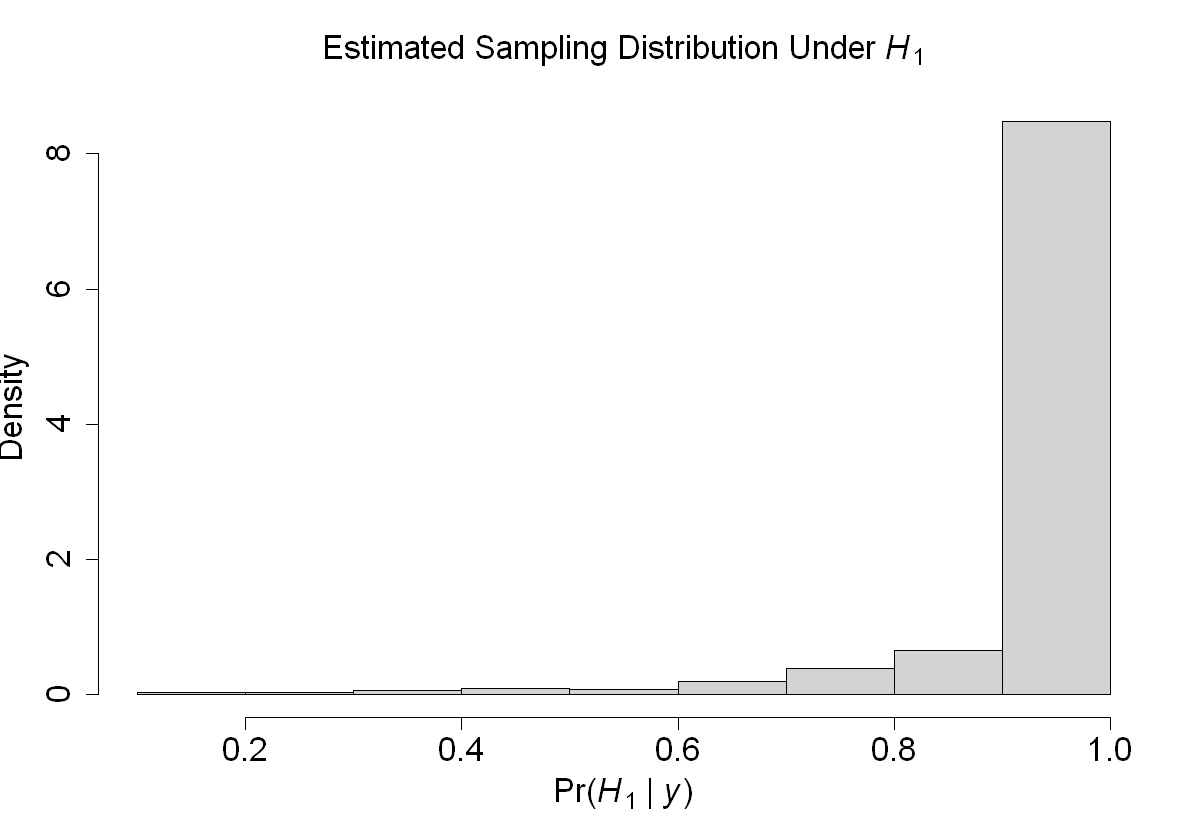

In [9]:
# this function modifies est_samp_dist() to allow for uncertainty in the 
# true_theta.t value across simulation repetitions
est_samp_double <- function(n, true_theta.c = 0.3, true_theta.t = 0.4, n_sim = 1000,
                         a.c = 1, b.c = 1, a.t = 1, b.t = 1, seed = 1) {
    # the inputs are described as follows:
    # n is the sample size in each group
    # true_theta.c is the "true" proportion in the control arm
    # theta_true.t is the "true" proportion in the treatment arm
    # n_sim is the number of simulation repetitions
    # a.c is the alpha parameter for the prior in the control group (default value is 1)
    # b.c is the beta parameter for the prior in the control group (default value is 1)
    # a.t and b.t are the corresponding inputs for the treatment group
    # seed is a seed for reproducibility

    set.seed(seed)
    post.probs <- replicate(n_sim, {
        yc <- rbinom(1, n, true_theta.c)
        # this ensures true_theta.t is uniformly distributed between 0.35 and 0.45
        # with the default settings
        yt <- rbinom(1, n, true_theta.t + runif(1, -0.05, 0.05))
        # use simulation to estimate posteriors
        post_t <- rbeta(1000, yt + a.t, n - yt + b.t)
        post_c <- rbeta(1000, yc + a.c, n - yc + b.c)
        # estimate posterior probability
        mean(post_t > post_c)
      })

    # return sampling distribution estimate
    post.probs
  
}

# estimate sampling distribution at n = 300
est.H1 <- est_samp_double(300, true_theta.t = 0.4, seed = 1)

# plot results
options(repr.plot.width = 10, repr.plot.height = 7)
hist(est.H1, main = bquote("Estimated Sampling Distribution Under "*italic(H)[1]),
    xlab = bquote('Pr('*italic(H)[1]*' | '*italic(y)*')'),
    freq = FALSE, cex = 1.65, cex.lab = 1.65, cex.main = 1.65, cex.axis = 1.65)

# estimate power
mean(est.H1 > gam)

We compare the sampling distribution estimate and power estimate for $n = 300$ above with the corresponding estimates obtained using our original $\Psi_1$ model below. What do you notice?

As a note, when the model $\Psi_1$ incorporates uncertainty about the data generation process, power is often called (Bayesian) *assurance* [[8]](https://onlinelibrary.wiley.com/doi/abs/10.1002/pst.175?casa_token=K-RDISin4EEAAAAA:Biy7dARsZuungBuB5hWjN2NZKtTAuUKogiNQHEjrUJ54JQ-FfzV8CyeJrHPMYeBRiQmuh55KuqArOMg).

[1] 0.751

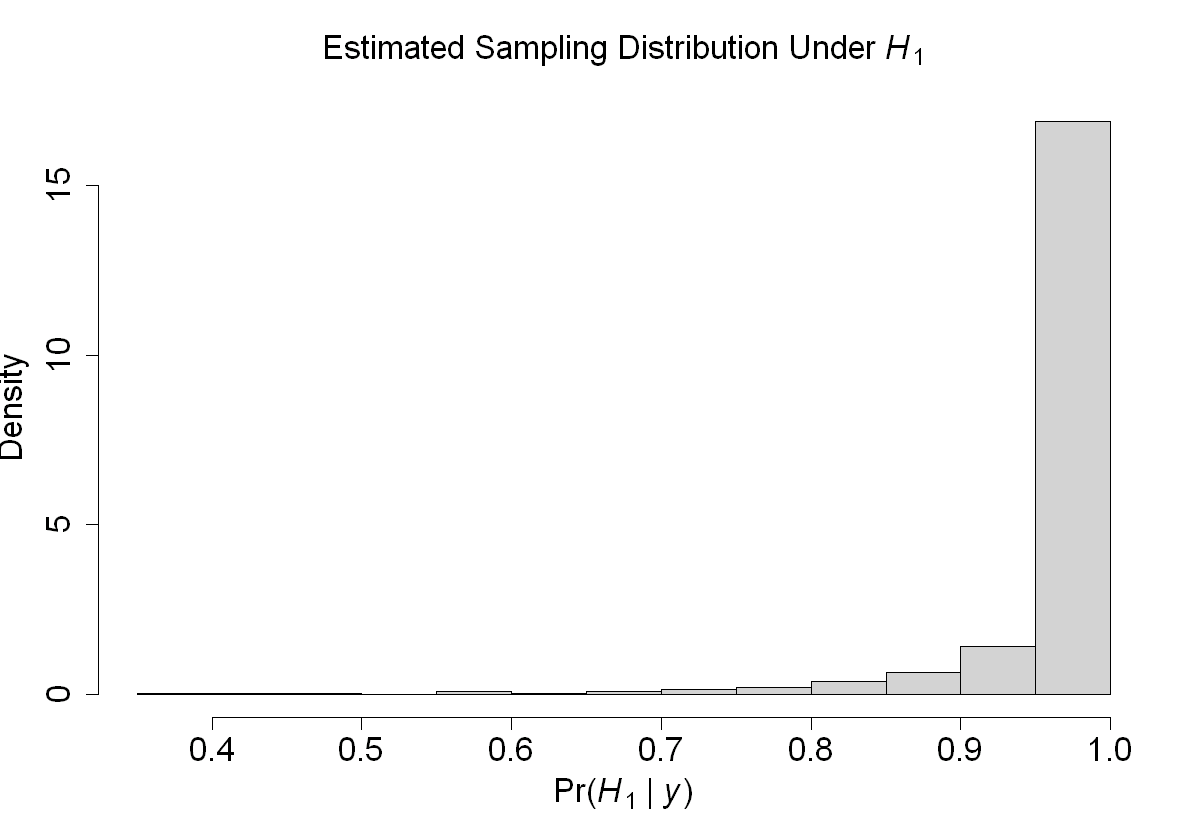

In [11]:
# compare to the previous approach that did not incorporate uncertainty
est.H1 <- est_samp_dist(300, true_theta.t = 0.4, seed = 1)

# plot results
options(repr.plot.width = 10, repr.plot.height = 7)
hist(est.H1, main = bquote("Estimated Sampling Distribution Under "*italic(H)[1]),
    xlab = bquote('Pr('*italic(H)[1]*' | '*italic(y)*')'),
    freq = FALSE, cex = 1.65, cex.lab = 1.65, cex.main = 1.65, cex.axis = 1.65)

# estimate power
mean(est.H1 > gam)

These changes to the $\Psi_1$ model are going to impact the sample size calculation. As an exercise, you could modify the `find_n()` function from earlier to incorporate uncertainty in the $\Psi_1$ data generation process.

## Efficient Exploration of the Sample Size Space

In this workshop, we have used binary search to explore different values of $n$ until we find a suitable one. However, it is computationally burdensome to obtain each estimate of the sampling distribution - particularly if we use many simulation repetitions for complex statistical models.

It would therefore be advantageous to develop methods that *reduce* the number of sampling distributions that we must estimate to design a clinical study. That was the focus of my PhD thesis and ongoing research ([[9]](https://www.tandfonline.com/doi/full/10.1080/01621459.2025.2476221?casa_token=DGZEXUOollwAAAAA%3AJ1G0Al3Nrmz2CaMOBsJP8pknxAwTbiceSq5A-bHBxUG7XIzNEpzuhzgC7BbdROYGyiGjlAgFZdPksg), [[10]](https://arxiv.org/abs/2501.13218), [[11]](https://arxiv.org/abs/2504.00856), [[12]](https://arxiv.org/abs/2312.10814)).

In this last section of the workshop, we use simulation to preview how novel methods for study design can be developed. These simulations consider the sampling distribution of the *logit* of $\Pr(H_1|y)$, where $\text{logit}(x) = \log(x) - \log(1-x)$. We consider the logits here because they are not *bounded* between 0 and 1 like the posterior probabilities themselves. Note that we can easily convert between the posterior probabilities and their logits.

The following function `est_samp_logit()` takes the same inputs as `est_samp_dist()` and estimates the sampling distribution of the logit of posterior probabilities. We will skip the details of this function.

In [12]:
# analogue function to est_samp_dist()
est_samp_logit <- function(n, true_theta.c = 0.3, true_theta.t = 0.3, n_sim = 1000,
                         a.c = 1, b.c = 1, a.t = 1, b.t = 1, seed = 1) {
    # the inputs are the same as est_samp_dist()

    logit <- function(x){log(x) - log(1-x)}
    set.seed(seed)
    post.logits <- replicate(n_sim, {
        yc <- rbinom(1, n, true_theta.c)
        yt <- rbinom(1, n, true_theta.t)
        # use simulation to estimate posteriors
        post_t <- rbeta(1000, yt + a.t, n - yt + b.t)
        post_c <- rbeta(1000, yc + a.c, n - yc + b.c)
        # estimate posterior probability using kernel density estimation
        # the next lines just ensure that the logits of the posterior 
        # probabilities are finite; it is not of grave importance
        l <- log(post_t - post_c + 1) - log(1 - (post_t - post_c))
        kd <- density(na.omit(l))
        prob <- mean(pnorm(0, ifelse(is.finite(l), l, 
                                          max(na.omit(l)) + 1), kd$bw, lower.tail = TRUE))
        if (prob < 0.00004){
         prob <- pnorm(0, mean(na.omit(l)), sd(na.omit(l)), lower.tail = TRUE)
        }
        
        ll <- -1*logit(prob)
        ll <- ifelse(ll == -Inf, min(subset(ll, is.finite(ll))) - 1, ll)
        ll <- ifelse(ll == Inf, max(subset(ll, is.finite(ll))) + 1, ll)
      })

    # return sampling distribution estimate (on logit scale)
    post.logits
  
}

To illustrate the use of the function, we consider our model $\Psi_1$ that did *not* incorporate uncertainty and $n = 300$. Clearly, the logits are not bounded between 0 and 1.

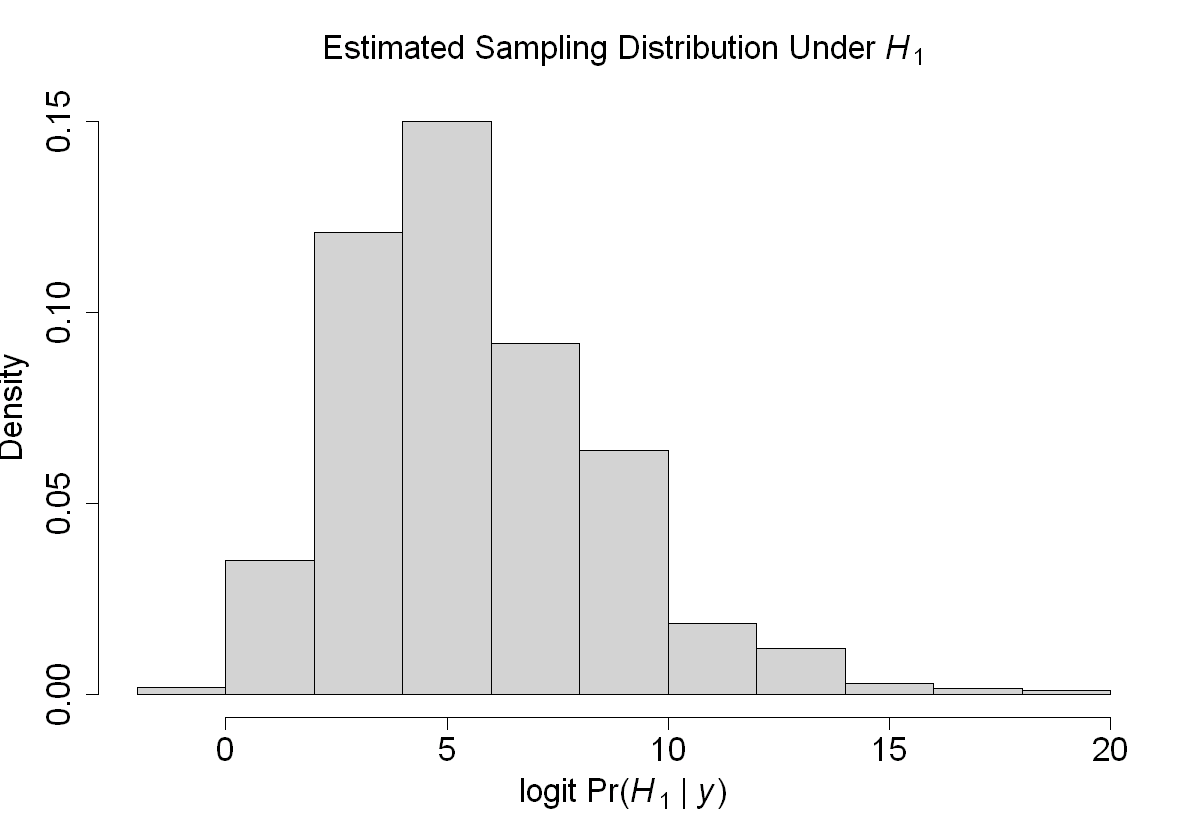

In [13]:
# illustrate for Psi_1 model that does not incorporate uncertainty with n = 300
est.logit <- est_samp_logit(300, true_theta.t = 0.4, seed = 1)

# plot results
options(repr.plot.width = 10, repr.plot.height = 7)
hist(est.logit, main = bquote("Estimated Sampling Distribution Under "*italic(H)[1]),
    xlab = bquote('logit Pr('*italic(H)[1]*' | '*italic(y)*')'),
    freq = FALSE, cex = 1.65, cex.lab = 1.65, cex.main = 1.65, cex.axis = 1.65)

To find a sample size $n$ that gives rise to suitable power, we want to explore how the sampling distribution of posterior probabilities *changes with the sample size*. 

Here, we are going to explore how *quantiles* of the sampling distribution of the logits of posterior probabilities change with $n$. 
* We are going to estimate the sampling distribution of logits at the sample sizes $n = \{100, 120, \dots, 300\}$.
* We will extract the 0.1-quantile, 0.2-quantile, ..., 0.9-quantile from each sampling distribution estimate.
* We will plot how each quantile changes with respect to the sample size.

In [14]:
# estimate the sampling distribution of the logits for each sample size
n.s <- seq(100, 300, 20)
est.logit.mat <- NULL
# append results in a matrix
for (j in 1:length(n.s)){
    est.logit.temp <- est_samp_logit(n.s[j], true_theta.t = 0.4, seed = j, n_sim = 10000) 
    est.logit.mat <- cbind(est.logit.mat, est.logit.temp)
    }

qs <- NULL
for (j in 1:length(n.s)){
  ## extract quantiles from estimates of the sampling distribution
  qs <- cbind(qs, quantile(est.logit.mat[,j], seq(0.1, 0.9, 0.1)))
}

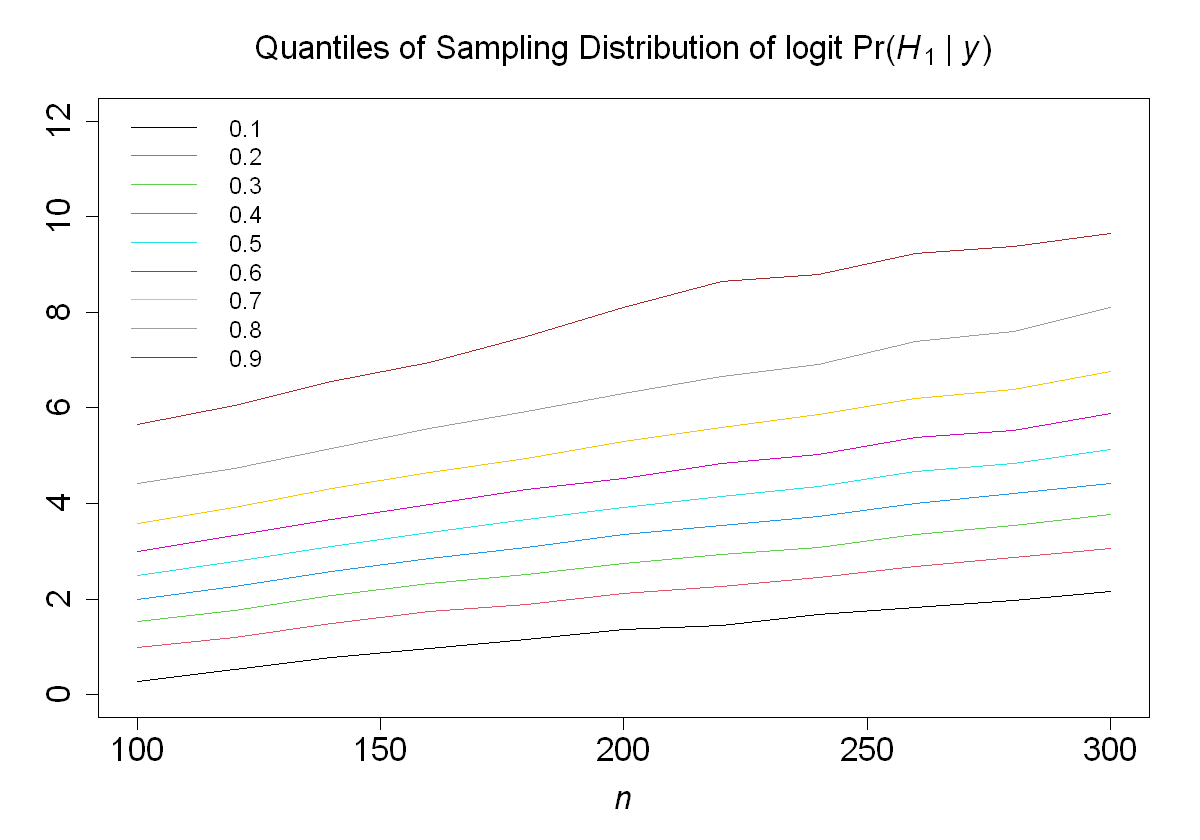

In [15]:
# start with the 0.1-quantile
plot(n.s, qs[1,], col = "black", type = "l",
     ylim = c(0,12), xlab = bquote(italic(n)),
     ylab = "",
     main = bquote('Quantiles of Sampling Distribution of logit Pr('*italic(H)[1]*' | '*italic(y)*')'),
     cex = 1.65, cex.lab = 1.65, cex.main = 1.65, cex.axis = 1.65)
# continue with the 0.2 through 0.8-quantiles
for (j in 2:8){
    lines(n.s, qs[j,], col = j)
    }
# end with the 0.9-quantile
lines(n.s, qs[9,], col = "brown")
legend("topleft", c("0.1", "0.2", "0.3", "0.4", "0.5",
                    "0.6", "0.7", "0.8", "0.9"),
       lty = 1, bty = "n",
       col = c(1:8, "brown"), cex = 1.2)

Although the plot above is impacted by simulation variability, we general trends to you observe?

We showed that this result holds true under general large-sample regularity conditions [[13]](https://books.google.ca/books?hl=en&lr=&id=Ocg2AAAAQBAJ&oi=fnd&pg=PR13&dq=vaart+&ots=Rp3WA5NL6E&sig=f8zGlHFunwX8v7eAySFa-1wvjAA) when our data generation process does *not* incorporate uncertainty in the parameter values. 
* Extensions have been developed to accommodate data generation processes that account for uncertainty.

We can use this result to design clinical studies by estimating the sampling distribution of posterior probabilities at only *two* values of $n$!

Hopefully, this example conveys that developing new computational methods for experimental design is an exciting area for future research!

## Wrap-Up

At the end of this workshop, you should now be able to
* explain how Bayesian posterior probabilities are used in clinical decision making
* examine the impact of the prior distribution on Bayesian experimental design
* estimate sampling distributions of posterior probabilities using simulation
* recognize the potential to develop more efficient methods to design Bayesian clincial studies

This workshop was an *introduction* to sample size calculations for clinical studies, but the concepts we discussed can be applied in much *more complex* settings. If you have questions about the workshop content or would like to chat about computational study design, please send me an email at [luke.hagar@mail.mcgill.ca](mailto:luke.hagar@mail.mcgill.ca).

Thank you for engaging with the workshop! :)